In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas
import math
from numpy.linalg import inv
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
print("Name: Animesh Tiwari")
print("Roll Number: 180104013")
print("MA311M - Scientific Computing Assignment-4")

Name: Animesh Tiwari
Roll Number: 180104013
MA311M - Scientific Computing Assignment-4


Question 1: Solving Ut = Uxx Heat Equation using Schmidt's Explicit Scheme.
            
            Given mesh parameters h = 0.1 , k = 0.005
            Initial Condition at time t = 0: U(x,0) = f(x) = sin(πx)
            Boundary Conditions: U(0,t) = U(1,t) = 0

In [ ]:
def TrueS(x,t):
  return np.exp(-np.pi**2*t)*np.sin(np.pi*x)

In [ ]:
def Initial(x):
  return math.sin(math.pi * x)

class SchmidtExplicit:
  def __init__(self,Initial,h,k,x=[0,1], t = [0,0.1]):
    self.h = h
    self.k = k
    self.r = self.k/(self.h**2)
    self.IC = Initial
    if math.modf(t[1]/self.k)[0]!=0:
      self.levels_required = int(t[1]/self.k) + 1
    else:
      self.levels_required = int(t[1]/self.k)

    self.xs = np.arange(x[0]+self.h,x[1],self.h)
    self.ts = np.arange(t[0]+self.k,t[1],self.k)

    self.N = int(x[1]/ self.h) 
    self.A = np.eye(self.N-1) + self.r * (np.eye(self.N-1)*(-2) + np.diag([1 for _ in range(self.N-2)], k = 1) + np.diag([1 for _ in range(self.N-2)], k = -1))
    self.u_j = np.array([self.IC(x) for x in self.xs]).reshape(-1,1)
    self.d_j = np.zeros([self.N-1,1]).reshape(-1,1) 


  def forward(self):
    level_values = []
    level_values.append(np.insert(np.insert(self.u_j,0,0),self.N,0))
    for level in range(self.levels_required):
      self.u_j = self.A @ self.u_j + self.d_j
      level_values.append(np.insert(np.insert(self.u_j,0,0),self.N,0))

    return level_values
      


In [ ]:
ExplicitSolver = SchmidtExplicit(Initial,0.1,0.005)
results = np.array(ExplicitSolver.forward()).squeeze()
print("Matrix for approximated solutions:")
print(results)
## matrix showing the approximated u values

Matrix for approximated solutions:
[[0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
  0.95105652 0.80901699 0.58778525 0.30901699 0.        ]
 [0.         0.29389263 0.55901699 0.76942088 0.9045085  0.95105652
  0.9045085  0.76942088 0.55901699 0.29389263 0.        ]
 [0.         0.2795085  0.53165676 0.73176275 0.8602387  0.9045085
  0.8602387  0.73176275 0.53165676 0.2795085  0.        ]
 [0.         0.26582838 0.50563562 0.69594773 0.81813562 0.8602387
  0.81813562 0.69594773 0.50563562 0.26582838 0.        ]
 [0.         0.25281781 0.48088805 0.66188562 0.77809321 0.81813562
  0.77809321 0.66188562 0.48088805 0.25281781 0.        ]
 [0.         0.24044403 0.45735172 0.62949063 0.74001062 0.77809321
  0.74001062 0.62949063 0.45735172 0.24044403 0.        ]
 [0.         0.22867586 0.43496733 0.59868117 0.70379192 0.74001062
  0.70379192 0.59868117 0.43496733 0.22867586 0.        ]
 [0.         0.21748366 0.41367851 0.56937963 0.6693459  0.70379192
  0.6693459  0.56937963 0

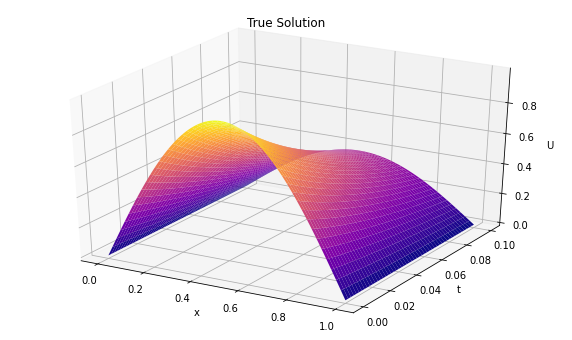

In [ ]:
#True
x = np.linspace(0,1,1000)
t = np.linspace(0,0.1,1000)
X,T = np.meshgrid(x,t)
Z = TrueS(X.ravel(),T.ravel()).reshape(X.shape)
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
Z1 = results
ax.plot_surface(X, T, Z,cmap='plasma', edgecolor='none')
#ax.plot_surface(X, T, Z1,cmap='viridis', edgecolor='none')
ax.set_title('True Solution')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')
plt.show()

(21, 11) (21, 11)


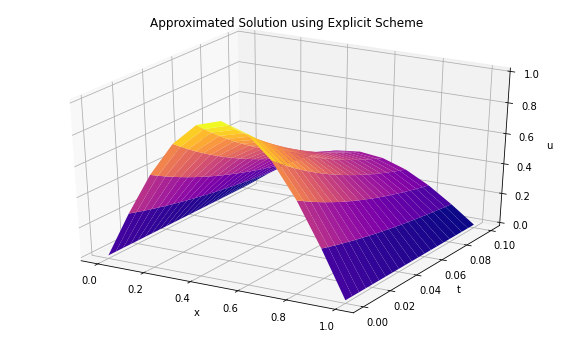

In [ ]:
#Approximated
x = np.arange(0,1.1,0.1)
t = list(np.arange(0,0.1+0.005,0.005))
X,T = np.meshgrid(x,t)
Z = results
print(X.shape,Z.shape)
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, Z,cmap='plasma', edgecolor='none')
ax.set_title('Approximated Solution using Explicit Scheme')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

Analysis for r>1/2 , we know from literature that the explicit scheme is stable for r<=1/2.

In [ ]:
h=0.05
r = [0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80] #different values of r in consideration
k = [item*(h**2) for item in r]

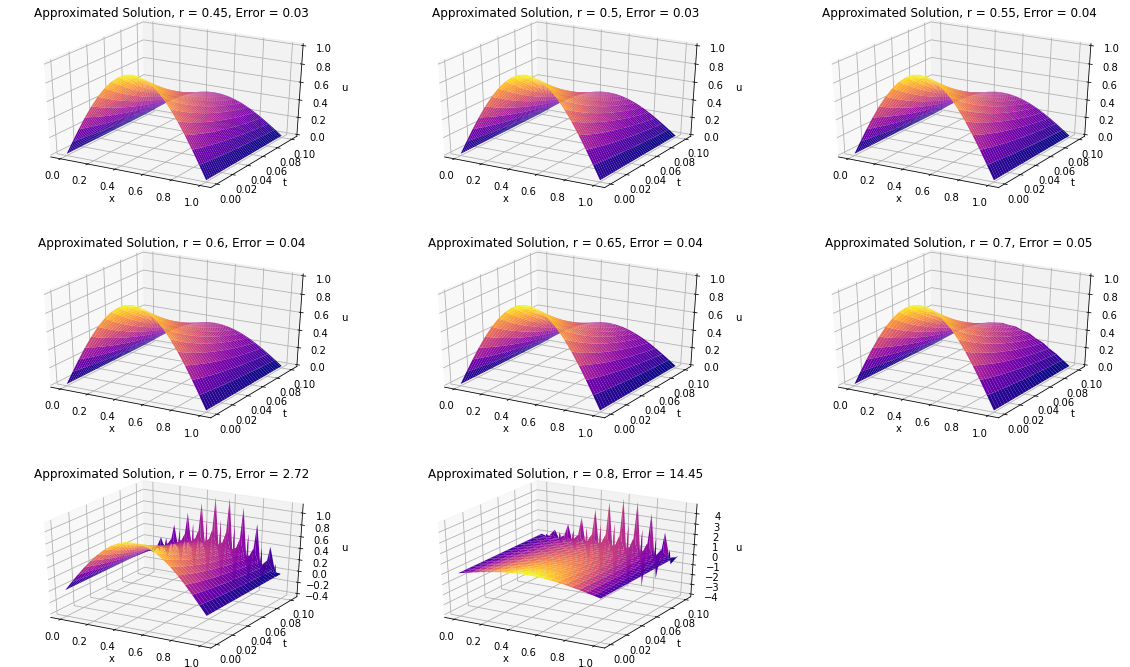

In [ ]:
fig = plt.figure(figsize=(20,12))

errors = []
for i in range(len(k)):
  ax = fig.add_subplot(3, 3, i+1, projection='3d')

  x = np.arange(0,1+h,h)
  t = list(np.arange(0,0.1+k[i],k[i]))
  X,T = np.meshgrid(x,t)

  ExplicitSolver = SchmidtExplicit(Initial,h,k[i])
  Z = np.array(ExplicitSolver.forward()).squeeze()

  e = np.linalg.norm(Z -  TrueS(X.ravel(),T.ravel()).reshape(X.shape))

  ax.plot_surface(X, T, Z,cmap='plasma', edgecolor='none')
  ax.set_title('Approximated Solution, r = {}, Error = {}'.format(r[i], round(e,2)))
  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u')

  errors.append(e)


From the above plots we find that we start to loose the stability if we go farther away from the stability conditionof r>1/2 , we find that for r = 0.75 and r = 0.8 we have a larger approximation error and the plots of approximated solution does not fit well with the true solution.

Question 2: Solving the heat equation using Crank-Nicolson Method
            with h = 0.1 , k = 0.01


In [ ]:
def Initial(x):
  if ((x>=0) and (x<=0.5)):
    return 2*x
  else:
    return 2*(1-x)

class Crank:
  def __init__(self,Initial,h,k,x=[0,1], t = [0,0.1]):
    self.h = h
    self.k = k
    self.r = self.k/(self.h**2)
    self.IC = Initial
    if math.modf(t[1]/self.k)[0]!=0:
      self.levels_required = int(t[1]/self.k) + 1
    else:
      self.levels_required = int(t[1]/self.k)

    self.xs = np.arange(x[0]+self.h,x[1],self.h)
    self.ts = np.arange(t[0]+self.k,t[1],self.k)

    self.N = int(x[1]/ self.h) 
    self.A = np.linalg.inv((np.eye(self.N-1) + self.r*np.eye(self.N-1) - (self.r/2)*np.diag([1 for _ in range(self.N-2)], k = 1) - (self.r/2)*np.diag([1 for _ in range(self.N-2)], k = -1)))    @     (np.eye(self.N-1) - self.r*np.eye(self.N-1) + (self.r/2)*np.diag([1 for _ in range(self.N-2)], k = 1) + (self.r/2)*np.diag([1 for _ in range(self.N-2)], k = -1))
    self.u_j = np.array([self.IC(x) for x in self.xs]).reshape(-1,1)
    self.d_j = np.zeros([self.N-1,1]).reshape(-1,1) 


  def forward(self):
    level_values = []
    level_values.append(np.insert(np.insert(self.u_j,0,0),self.N,0))
    for level in range(self.levels_required):
      self.u_j = self.A @ self.u_j + self.d_j
      level_values.append(np.insert(np.insert(self.u_j,0,0),self.N,0))

    return level_values
      
CNSolver = Crank(Initial,0.1,0.01)
results = np.array(CNSolver.forward()).squeeze()
print("Matrix for Approximated Solution")
print(results)

Matrix for Approximated Solution
[[0.         0.2        0.4        0.6        0.8        1.
  0.8        0.6        0.4        0.2        0.        ]
 [0.         0.19889503 0.39558011 0.58342541 0.73812155 0.76906077
  0.73812155 0.58342541 0.39558011 0.19889503 0.        ]
 [0.         0.19362046 0.37890174 0.53966607 0.64606087 0.69209121
  0.64606087 0.53966607 0.37890174 0.19362046 0.        ]
 [0.         0.18260561 0.35152072 0.49019072 0.58427955 0.61517021
  0.58427955 0.49019072 0.35152072 0.18260561 0.        ]
 [0.         0.16833099 0.32180323 0.44608561 0.52673895 0.55550925
  0.52673895 0.44608561 0.32180323 0.16833099 0.        ]
 [0.         0.15375544 0.29321852 0.40470206 0.47704754 0.50189324
  0.47704754 0.40470206 0.29321852 0.15375544 0.        ]
 [0.         0.13990108 0.26638581 0.36718467 0.43208678 0.45456716
  0.43208678 0.36718467 0.26638581 0.13990108 0.        ]
 [0.         0.1270402  0.24177498 0.33297398 0.39164834 0.41186756
  0.39164834 0.33297398 0

Text(0.5, 0, 'u')

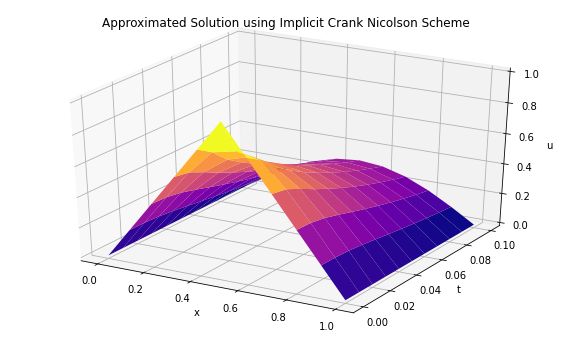

In [ ]:

x = np.arange(0,1.1,0.1)
t = list(np.arange(0,0.1+0.01,0.01))
X,T = np.meshgrid(x,t)
Z = results
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, Z,cmap='plasma', edgecolor='none')
ax.set_title('Approximated Solution using Implicit Crank Nicolson Scheme')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

Question 3: Using Schmidt's Explicit method to solve 2-D Heat Equation.

In [ ]:
def func(x,y):
    return np.sin(x)*np.sin(y)

r=1/4
h=0.05
k=r*h*h
time_levels=int(1/k)
x_levels=int(1/h)
y_levels=x_levels
values=np.zeros((int(x_levels)+1,int(y_levels)+1,int(time_levels)+1))
for i in range(1,x_levels):
    for j in range(1,y_levels):
        values[i][j][0]=func(i*h,j*h)
        #print(values[i][j][0])

for z in range(1,time_levels+1):
    for i in range(1,x_levels):
        for j in range(1,y_levels):
            values[i][j][z]=values[i][j][z-1]+r*(values[i+1][j][z-1]+values[i-1][j][z-1]+values[i][j+1][z-1]+values[i][j-1][z-1]-4*values[i][j][z-1])


            

Plots of solutions for different values of Time:


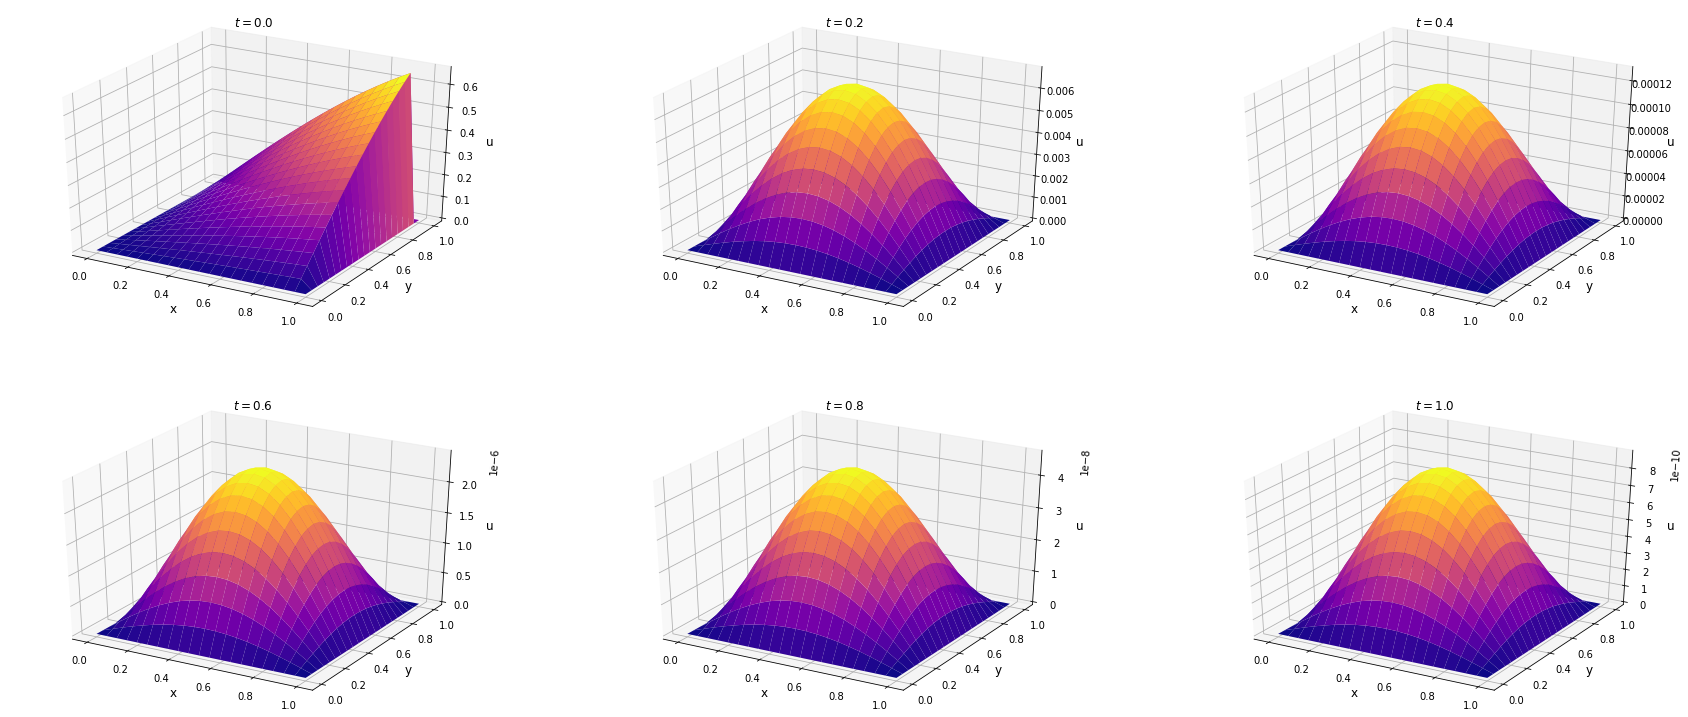

In [ ]:

print("Plots of solutions for different values of Time:")
fig = plt.figure(figsize=(30,20))

from mpl_toolkits.mplot3d import Axes3D
time = [0,0.2,0.4,0.6,0.8,1]

for i,t in enumerate(time):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    time = t/k
    x = [i*h for i in range(x_levels+1)]
    y = [i*h for i in range(y_levels+1)]
    X,Y = np.meshgrid(x,y)
    Z = values[:,:,int(time)]
    ax.plot_surface(X, Y, Z,cmap='plasma', edgecolor='none')
    ax.set_title('$t = {}$'.format(round(time * k,2)))
    ax.set_xlabel('x',fontdict={'size':12})
    ax.set_ylabel('y',fontdict={'size':12})
    ax.set_zlabel('u',fontdict={'size':12})

plt.show()
